In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

random_state = 42

# 1: import the data and output the first rows, the describe function and the data dimensions

In [4]:
data = pd.read_csv('./exam_2021_01_27.csv', header=None, names=[1, 2, 3, 4, 5])
data.head() #first rows

,1,2,3,4,5
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [5]:
print(f'data rows: {data.shape[0]}, data columns: {data.shape[1]}') #data dimensions
data.describe() #describe function

data rows: 150, data columns: 5


,1,2,4,5
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


# 2: Drop the rows with null values

In [6]:
data = data.dropna(how='any')

In [7]:
data.isnull().sum() > 0 #check if there are still columns with null values

1    False
2    False
3    False
4    False
5    False
dtype: bool

In [8]:
print(data.shape) #print the shape again after the row eliminations

(122, 5)


# 3: convert the predicted value with ordinal encoder

In [9]:
data[3] = OrdinalEncoder().fit_transform(data[[3]])

In [10]:
data.head() # visualize the new data

,1,2,3,4,5
4,5.0,3.6,0.0,0.2,0
7,5.0,3.4,0.0,0.2,0
10,5.4,3.7,0.0,0.2,0
11,4.8,3.4,0.0,0.2,0
13,4.3,3.0,0.0,0.1,0


# 4: Split in train and test set

In [11]:
target = 5
X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
print(X_train.shape[0], X_test.shape[0])

91 31


# 5: Use two classification methods 

## 6: Decision tree

In [12]:
#Get the max depth

decision_tree = DecisionTreeClassifier(random_state=random_state)
decision_tree.fit(X_train,y_train)
max_depth = decision_tree.tree_.max_depth
print(f'max depth on train data: {max_depth}')

max depth on train data: 3


In [13]:
depth_range = range(1, max_depth + 1)

accuracy_values_decision_tree = []

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    accuracy_cross_validation = cross_val_score(model, X_train, y_train, scoring='accuracy')
    accuracy_values_decision_tree.append(np.mean(accuracy_cross_validation))

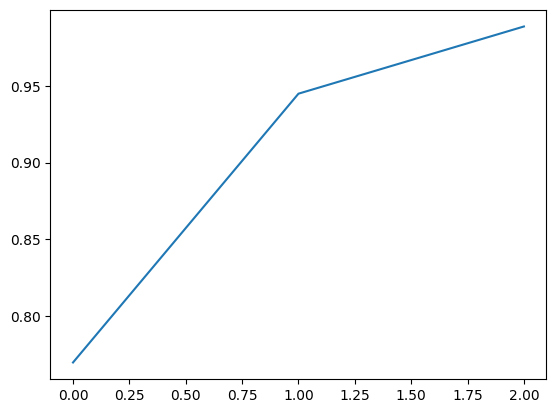

In [14]:
plt.plot(range(len(accuracy_values_decision_tree)), accuracy_values_decision_tree);

In [23]:
#get the best parameter
best_depth = depth_range[np.argmax(accuracy_values_decision_tree)]

In [17]:
#compute the best decision tree
best_decision_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=random_state)
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## 7: show the accuracy on the test set and the confusion matrix 

accuracy on the test set: 87.0%


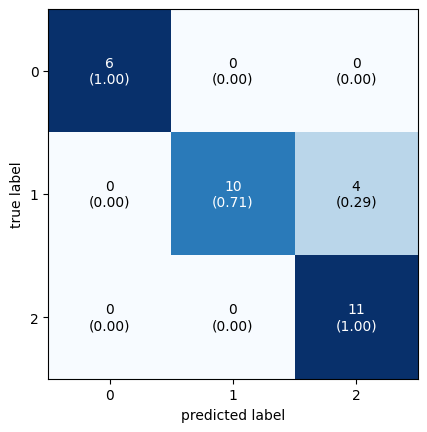

In [22]:
y_test_predicted = best_decision_tree.predict(X_test)
accuracy_test_value = round(accuracy_score(y_test, y_test_predicted), 2) * 100
print(f'accuracy on the test set: {accuracy_test_value}%')
confusion_matrix_test = confusion_matrix(y_test, y_test_predicted)
plot_confusion_matrix(confusion_matrix_test, show_normed=True);

## 8: K neighbors

In [35]:
#starting parameters
starting_n_neighbors = int(np.sqrt(X_train.shape[0]))
print(f'starting n neighbors: {starting_n_neighbors}')

starting n neighbors: 9


In [36]:
n_neighbors_range = range(int(starting_n_neighbors / 2), starting_n_neighbors * 2)
accuracy_values_k_neighbors = []

for n_neighbors in n_neighbors_range:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    accuracy_cross_validation = cross_val_score(model, X_train, y_train, scoring='accuracy')
    accuracy_values_k_neighbors.append(np.mean(accuracy_cross_validation))

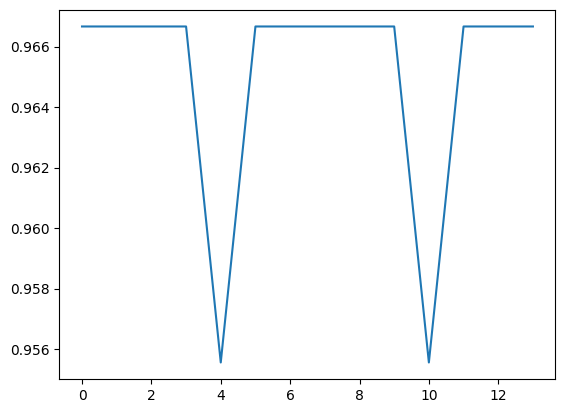

In [37]:
plt.plot(range(len(accuracy_values_k_neighbors)), accuracy_values_k_neighbors);

In [38]:
#get the best parameter
best_neighbors = n_neighbors_range[np.argmax(accuracy_values_k_neighbors)]

In [39]:
#compute the best k neighbors
best_k_neighors = KNeighborsClassifier(n_neighbors=best_neighbors)
best_k_neighors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

## 9: show the accuracy on the test set and the confusion matrix 

accuracy on the test set: 90.0%


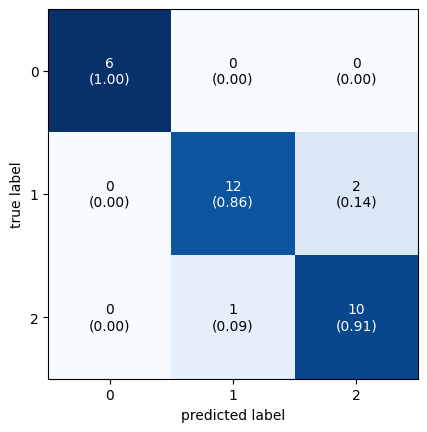

In [40]:
y_test_predicted = best_k_neighors.predict(X_test)
accuracy_test_value = round(accuracy_score(y_test, y_test_predicted), 2) * 100
print(f'accuracy on the test set: {accuracy_test_value}%')
confusion_matrix_test = confusion_matrix(y_test, y_test_predicted)
plot_confusion_matrix(confusion_matrix_test, show_normed=True);